### Problem Statement - Objective
To create a machine leanring algorithm capable of detecting hate speech is important for mitigating its harmful effects and promoting a safer online environment.
To sentimantal analysis tweet for positive, negetive and neutral tweet. 

In [ ]:
### About the dataset - contain the columns as follwoing 
1) Count - Number of crowdflower userd who coded each tweet
2) Hate_speech - Number of crowdflower users who judged the tweet to the hate speech
3) Offensive_language - Number of CF uers who juded the tweet to be offensive
4) Neither - Number of CF users who judged the tweet to be neither offensive or non-offensive
5) Class - Label for the majority of the CF users. 0 - hate speech, 1- offensive language, 2 - neither 
6) Tweet - Text meassage

In [ ]:
### Steps -
1) importing all required libraries then import the dataset
2) EDA - Expolatory data analysis 
3) Feature Extraction
4) Selecting the model - Machine learning algorithm to apply
5) Spliting the data into test and train
6) Accuary of the model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Hate_speech.csv")

In [3]:
data.head(5)

,No,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
data.shape

(24783, 7)

In [5]:
data.isnull().sum()

No                    0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
data.describe()

,No,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
data.dtypes

No                     int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [9]:
# creating Label on basis of class
data['Labels'] = data['class'].map({0:"Hate speech",1:"Offensive language",2:"No hate or offensive language"})

In [10]:
import re  # regular expression- used fonr pattern matching and manipulation of strings
import nltk # Natural Language Toolkit (NLTK) - provides easy-to-use interfaces and functionalities for tasks such as tokenization, stemming, lemmatization,part-of-speech tagging, named entity recognition
import string

In [11]:
!pip install wordcloud

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))


In [15]:
# importing the stemmer - function to initializes a Snowball stemmer for the English language. The Snowball stemmer is a stemming algorithm designed to support multiple languages, including English, French, Spanish, German, and others.
stemmer = nltk.SnowballStemmer("english")

In [16]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+','',text)
    text = re.sub('\[.*?\]' ,'',text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '' ,text)
    text = re.sub('\n','',text)

    text = [word for word in text. split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [17]:
data['tweet'] = data['tweet'].apply(clean_data)

In [18]:
idx = data.index[data['tweet'] == 'Bajaj DX 2 L/W Dry Iron'].tolist()
idx1 = data.index[data['tweet'] == 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)'].tolist()
idx2 = data.index[data['tweet'] == 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)'].tolist()

In [19]:
rating = data["tweet"].value_counts()
numbers=rating.index
quantity=rating.values

In [20]:
rating

tweet
9733 best asian massag park slope top rate spa 9733 7186220221  24                                       14
97339733973397339733 grand open  97339733973397339733 top class 9733 orient massag 9733 perfect 9733      8
bitch                                                                                                     7
bad bitch thing like                                                                                      5
9733 best asian massag brooklyn park slope top rate spa 97337186220221  24                                5
                                                                                                         ..
rich light skin coon expect                                                                               1
prettier amber rt yumiyoko pussi pretti                                                                   1
one call pussi injuri                                                                                     1
knew  bitch youll bett

In [21]:
numbers

Index(['9733 best asian massag park slope top rate spa 9733 7186220221  24 ',
       '97339733973397339733 grand open  97339733973397339733 top class 9733 orient massag 9733 perfect 9733 ',
       'bitch', 'bad bitch thing like',
       '9733 best asian massag brooklyn park slope top rate spa 97337186220221  24 ',
       'need bitch', 'bitch ', 'realli bitch', 'hoe aint loyal',
       'stupid bitch',
       ...
       'talk twitter bc pussi real life', 'stay gon bitch', 'hoe 8212 idk ',
       'shade shit bitch rt axolros yourwifecantread',
       'bad bad bitch make late', 'rich light skin coon expect',
       'prettier amber rt yumiyoko pussi pretti', 'one call pussi injuri',
       'knew  bitch youll better 128074',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype='object', name='tweet', length=24648)

In [22]:
quantity

array([14,  8,  7, ...,  1,  1,  1], dtype=int64)

In [50]:
data["tweet"].value_counts() == 1

tweet
9733 best asian massag park slope top rate spa 9733 7186220221  24                                       False
97339733973397339733 grand open  97339733973397339733 top class 9733 orient massag 9733 perfect 9733     False
bitch                                                                                                    False
bad bitch thing like                                                                                     False
9733 best asian massag brooklyn park slope top rate spa 97337186220221  24                               False
                                                                                                         ...  
rich light skin coon expect                                                                               True
prettier amber rt yumiyoko pussi pretti                                                                   True
one call pussi injuri                                                                                     

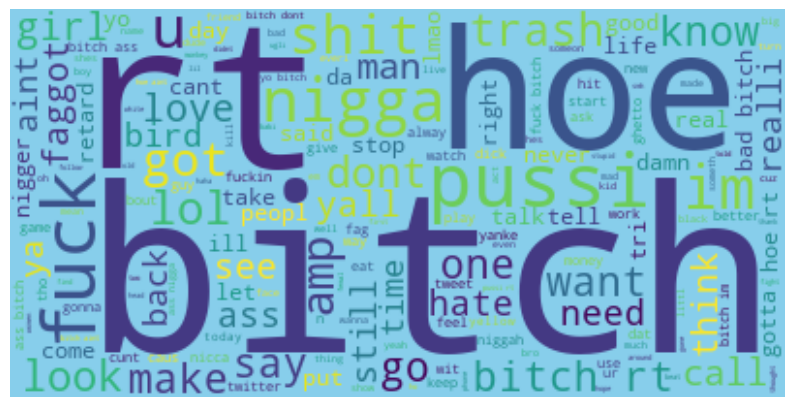

In [26]:
#use a word cloud to visualize the most used words in the reviews column:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="skyblue").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
nltk.download("vader_lexicon")
sentiments=SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

data = data[["tweet","Positive","Negative","Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
data

,tweet,Positive,Negative,Neutral
0,rt mayasolov woman shouldnt complain clean ho...,0.147,0.157,0.696
1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,0.000,0.241,0.759
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,0.000,0.548,0.452
3,rt cganderson vivabas look like tranni,0.333,0.000,0.667
4,rt shenikarobert shit hear might true might f...,0.146,0.385,0.469
...,...,...,...,...
24778,yous muthafin lie 8220lifeask 20pearl coreyema...,0.000,0.000,1.000
24779,youv gone broke wrong heart babi drove redneck...,0.000,0.457,0.543
24780,young buck wanna eat dat nigguh like aint fuck...,0.217,0.000,0.783
24781,youu got wild bitch tellin lie,0.000,0.432,0.568


In [33]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    elif (b>a) and (b>c):
        print("Negative ")
    elif (c>a) and (c>b):
        print("Neutral ")

In [34]:
sentiment_score(x,y,z)

Neutral 


## Buildind the model

In [39]:
data = pd.read_csv("Hate_speech.csv")

In [40]:
data['Labels'] = data['class'].map({0:"Hate speech",1:"Offensive language",2:"No hate or offensive language"})

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
data

,No,count,hate_speech,offensive_language,neither,class,tweet,Labels
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,1,3,0,3,0,1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,Offensive language
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,Offensive language
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni,Offensive language
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie 8220lifeask 20pearl coreyema...,Offensive language
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie,Offensive language


In [44]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
stemmer = nltk.SnowballStemmer("english")

In [46]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+','',text)
    text = re.sub('\[.*?\]' ,'',text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '' ,text)
    text = re.sub('\n','',text)

    text = [word for word in text. split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [47]:
data['tweet'] = data['tweet'].apply(clean_data)

In [48]:
X = np.array(data["tweet"])
y = np.array(data['Labels'])

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [52]:
X 

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       ' rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [53]:
cv = CountVectorizer()
X = cv.fit_transform(X)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
X_train

<16604x33742 sparse matrix of type '<class 'numpy.int64'>'
	with 142185 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.tree import DecisionTreeClassifier



In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dt.predict(X_test)


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 157,   41,  267],
       [  41, 1176,  162],
       [ 246,  263, 5826]], dtype=int64)

<Axes: >

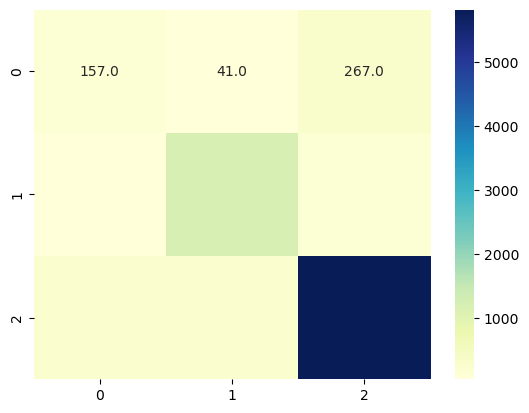

In [60]:
sns.heatmap(cm, annot=True, fmt= ".1f", cmap = "YlGnBu")

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8752903777967966

In [62]:
Accuracy_score = accuracy_score(y_test,y_pred)*100
Accuracy_score

87.52903777967967

In [65]:
sample1 = "This is a hateful and discriminatory message targeting a specific group based on their race."
clean_data(sample1)

'hate discriminatori messag target specif group base race'

In [66]:
sample2 = "Let's unite and kill all the people who are protesting against the govenment"
clean_data(sample2)

'let unit kill peopl protest goven'

### By using RandomForestClassifier Building model


In [6]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [7]:
data = pd.read_csv("Hate_speech.csv")
data

,No,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
# creating Label on basis of class
data['Labels'] = data['class'].map({0:"Hate speech",1:"Offensive language",2:"No hate or offensive language"})

In [9]:
import re  # regular expression- used fonr pattern matching and manipulation of strings
import nltk # Natural Language Toolkit (NLTK) - provides easy-to-use interfaces and functionalities for tasks such as tokenization, stemming, lemmatization,part-of-speech tagging, named entity recognition
import string

In [10]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [11]:
stemmer = nltk.SnowballStemmer("english")

In [12]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+','',text)
    text = re.sub('\[.*?\]' ,'',text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '' ,text)
    text = re.sub('\n','',text)

    text = [word for word in text. split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [13]:
data['tweet'] = data['tweet'].apply(clean_data)

In [14]:
X = np.array(data["tweet"])
y = np.array(data['Labels'])

In [15]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       ' rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [17]:
cv = CountVectorizer()
X = cv.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_classifier.predict(X_test)

In [21]:
accuracy_score_value = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score_value)

Accuracy: 0.8933854994498105


In [39]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                               precision    recall  f1-score   support

                  Hate speech       0.50      0.30      0.37       465
No hate or offensive language       0.86      0.79      0.82      1379
           Offensive language       0.91      0.96      0.93      6335

                     accuracy                           0.89      8179
                    macro avg       0.76      0.68      0.71      8179
                 weighted avg       0.88      0.89      0.88      8179

